Importamos librerías

In [21]:
from sklearn.cluster import KMeans
import cv2
import numpy as np
import matplotlib.pyplot as plt

Importamos iamgen con cv2

In [22]:
image = cv2.imread("./Imagenes/Oficina.jpg")

In [23]:
image.shape

(855, 1280, 3)

Mostramos la imagen original

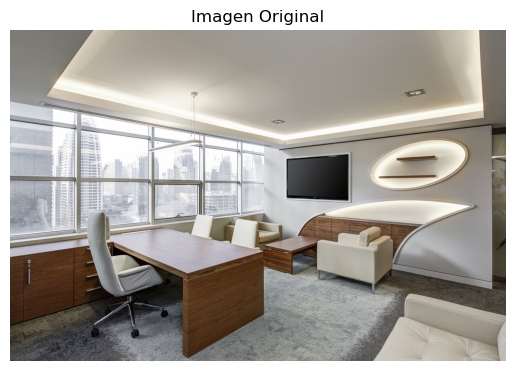

In [24]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")
plt.show()

Mostramos la imagen convertida por OpenCV

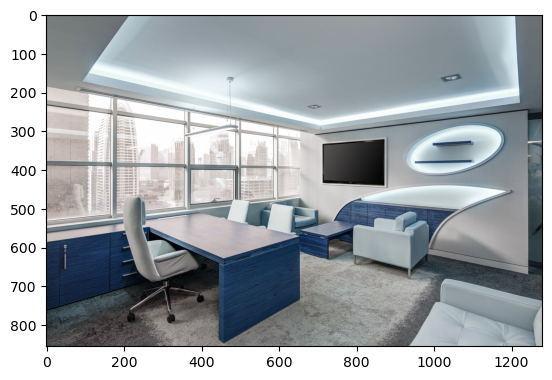

In [25]:
plt.imshow(image)

Preparación de datos

In [26]:
x = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).reshape(-1,3)  

In [27]:
x.shape

(1094400, 3)

Aplicamos el modelo de kmeans y definimos el número de colores de la imagen(clusters)

In [28]:
kmeans = KMeans(n_clusters=12)
kmeans.fit(x) #ponemos n según el número de colores que queramos

KMeans(n_clusters=12)

Reconstrucción de imagen

In [29]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]

In [30]:
kmeans.cluster_centers_  #cada fila es un centroide con 3 dimensiones(RGB)

array([[178.8169521 , 175.47332861, 168.76033986],
       [ 59.68851822,  56.91468068,  52.34440763],
       [248.27257688, 247.92844927, 244.60894692],
       [109.58158498, 104.08251083,  95.96532744],
       [ 25.54850179,  21.41821039,  18.34241105],
       [218.26910765, 217.77931567, 216.08333079],
       [ 77.29635577,  47.68917879,  24.68631224],
       [147.17533969, 143.10916447, 134.38262048],
       [196.90018019, 194.39048194, 191.4590994 ],
       [160.11100617, 156.44745179, 148.85406963],
       [ 88.35432629,  79.90380002,  70.50077393],
       [126.40333943, 124.04516758, 118.06741012]])

In [31]:
kmeans.labels_   #cada elemento indica el número de cluster asignado al pixel correspondiente

array([11, 11, 11, ...,  8,  8,  8], shape=(1094400,), dtype=int32)

In [32]:
segmented_image = segmented_image.reshape(image.shape)

Mostramos como queda la imagen reconstruída

dtype('float64')

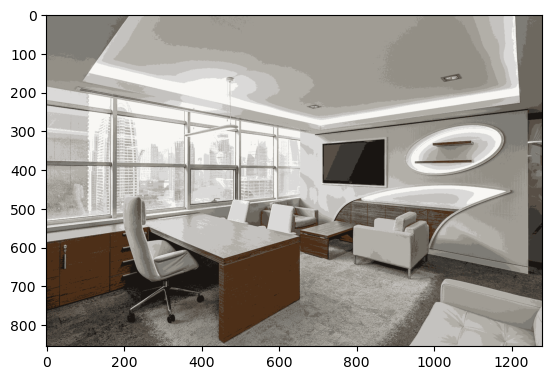

In [33]:
imagen=segmented_image/255 #para que esté entre 0 y 1
plt.imshow(imagen) 
imagen.dtype

Hacemos una comparativa entre la imagen original, la imagen hecha por OpenCV y la imagen reconstruída con kmeans

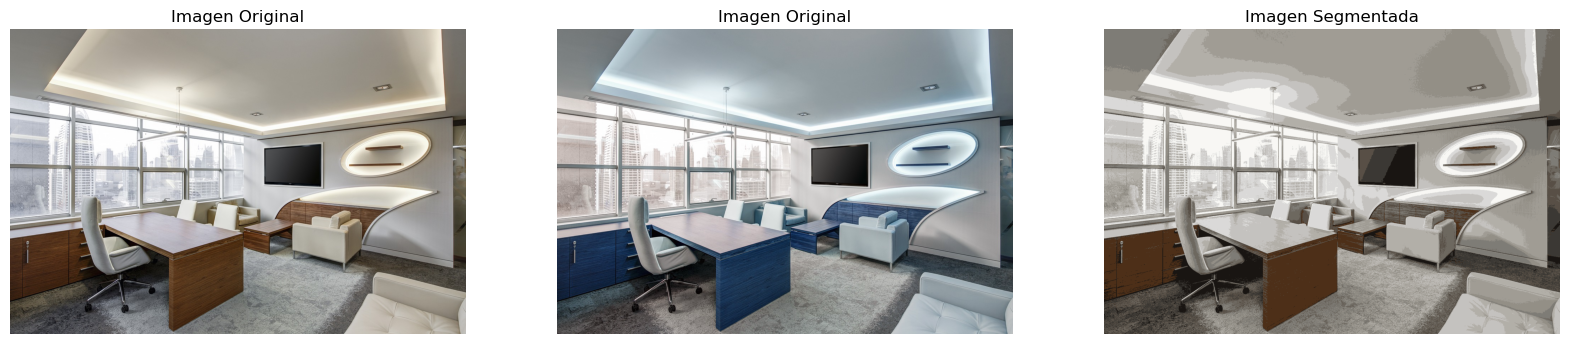

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Imagen Original")
ax[0].axis("off")

ax[1].imshow(image)
ax[1].set_title("Imagen en OpenCV")
ax[1].axis("off")

ax[2].imshow(imagen)
ax[2].set_title("Imagen Segmentada")
ax[2].axis("off")

plt.show()

Ponemos un logo sobre la imagen original

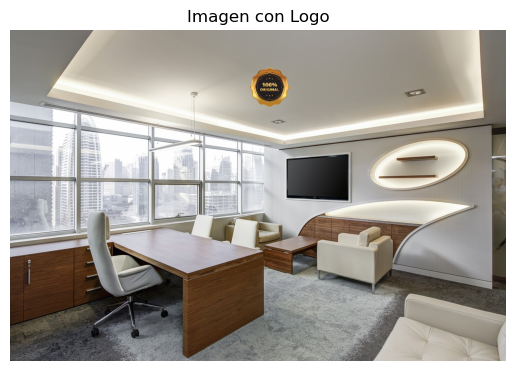

In [35]:
# Cargar el logo y la imagen principal
logo = cv2.imread("./Imagenes/logo.png", cv2.IMREAD_UNCHANGED)  # Asegúrate de que el logo tenga un canal alfa (transparencia)
image_with_logo = image.copy()

# Redimensionar el logo si es necesario
logo = cv2.resize(logo, (100, 100))  # Cambia las dimensiones según sea necesario

# Crear una máscara para el logo y su inversa
logo_alpha = logo[:, :, 3]  # Canal alfa del logo
logo_rgb = logo[:, :, :3]  # Canales RGB del logo
mask = cv2.merge([logo_alpha, logo_alpha, logo_alpha])  # Crear una máscara de 3 canales
mask_inv = cv2.bitwise_not(mask)

# Seleccionar la región de interés (ROI) en la imagen principal
x_offset, y_offset = 620, 100  # Posición donde se colocará el logo
roi = image_with_logo[y_offset:y_offset+logo.shape[0], x_offset:x_offset+logo.shape[1]]

# Superponer el logo en la ROI
background = cv2.bitwise_and(roi, cv2.bitwise_not(mask))  # Fondo de la ROI
foreground = cv2.bitwise_and(logo_rgb, mask)  # Logo con máscara aplicada
combined = cv2.add(background, foreground)  # Combinar fondo y logo

# Colocar la ROI modificada de vuelta en la imagen principal
image_with_logo[y_offset:y_offset+logo.shape[0], x_offset:x_offset+logo.shape[1]] = combined

# Mostrar la imagen con el logo
plt.imshow(cv2.cvtColor(image_with_logo, cv2.COLOR_BGR2RGB))
plt.title("Imagen con Logo")
plt.axis("off")
plt.show()

Creamos una máscara

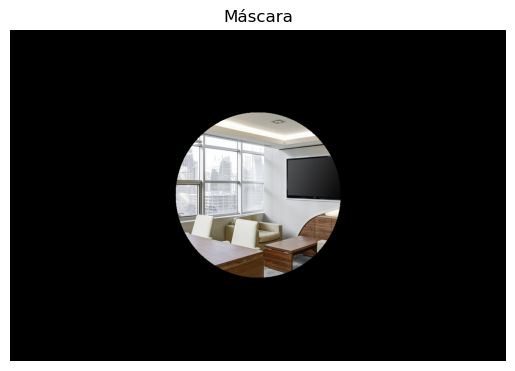

In [36]:
# Crear una copia de la imagen original
image_with_mask = image.copy()

# Dimensiones de la imagen
height, width, _ = image.shape

# Crear una máscara negra del mismo tamaño que la imagen
mask = np.zeros((height, width), dtype=np.uint8)

# Definir el centro y el radio del círculo
center = (width // 2, height // 2)
radius = min(width, height) // 4

# Dibujar un círculo blanco en la máscara
cv2.circle(mask, center, radius, 255, -1) 

# Aplicar la máscara a la imagen original
masked_image = cv2.bitwise_and(image_with_mask, image_with_mask, mask=mask)

# Mostrar la imagen con la máscara aplicada
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title("Máscara")
plt.axis("off")
plt.show()

Hacemos un desenfoque sobre la imagen

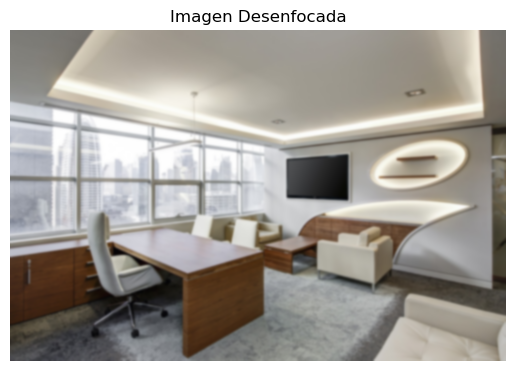

In [37]:
# Aplicar un desenfoque gaussiano a la imagen original
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Mostrar la imagen desenfocada
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Desenfocada")
plt.axis("off")
plt.show()

Vemos como queda la imagen con los bordes Canny

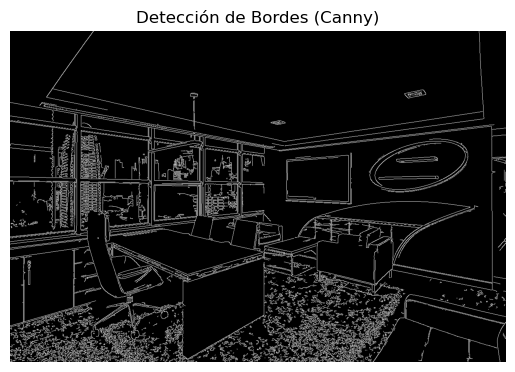

In [38]:
# Aplicar el algoritmo de detección de bordes Canny
edges = cv2.Canny(image, 100, 200)

# Mostrar la imagen con los bordes detectados
plt.imshow(edges, cmap='gray')
plt.title("Detección de Bordes (Canny)")
plt.axis("off")
plt.show()